### Predicting the percentage of marks that a student is expected to score based upon the number of hours they studied by implementing univariate linear regression.

In [684]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [685]:
#Reading the text file
marks = pd.read_csv("project.txt")

### Data Exploration Part

In [686]:
#checking the first five rows
marks.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [687]:
#Checking the number of rows and columns in the dataset respectively
marks.shape

(25, 2)

In [688]:
# Checking if there are any null values present in the dataset.Apparently,We see there are no null values present.
marks.isnull().transpose()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Hours,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Scores,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [689]:
#checking out the statistical data of numerical columns in the dataset.
marks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [690]:
 #checking the datatypes of the dependent and independent variables
marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Data Visualization

Text(0.5, 0, 'Hours')

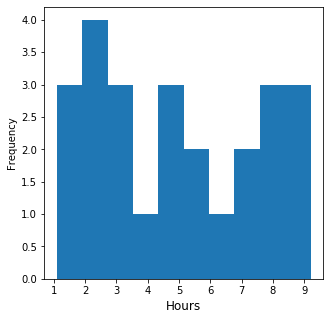

In [691]:
#I have plotted the histogram which depicts the average, maximum and minimum number of hours which are taken by the students to study!!
# The Distibution is kinda good.
plt.figure(figsize =(5,5))
marks["Hours"].plot.hist(bins=10)
plt.xlabel("Hours",fontsize=12)

Text(0.5, 0, 'Scores')

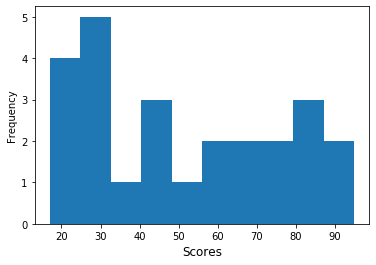

In [692]:
#This is the histogram plot which shows the average,maximum and minimum number of marks obtained by the students.
marks["Scores"].plot.hist(bins=10)
plt.xlabel("Scores",fontsize=12)

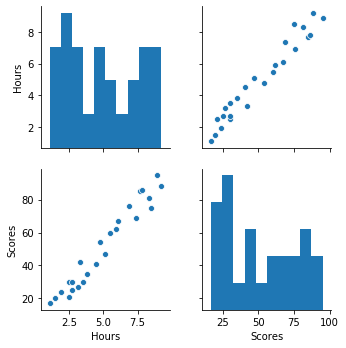

In [693]:
# making pairplot to see the relationship between the dependent and independent variables.
sns.pairplot(marks)

In [694]:
# Scores obtained by most of the students and Hours taken by most of the students just to get an idea.
marks.median()

Hours      4.8
Scores    47.0
dtype: float64

### Dividing the independent variable and dependent variable into x and y variable respectively and Exploring the relationship between them.

In [695]:
#Here the independent variable is Hours and dependent variable is Scores.
x = np.array(marks["Hours"])
y = np.array(marks["Scores"])

In [696]:
#Checking the shape of the variables
x.shape,y.shape

((25,), (25,))

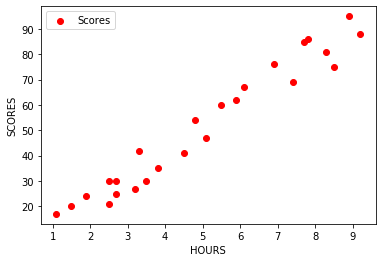

In [697]:
# PLOTTING THE GRAPH BETWEEN THE SCORES AND HOURS TO SEE THE RELATIONSHIP BETWEEN THE TWO VARIABLES(Dependent and independent)
plt.scatter(marks["Hours"],marks["Scores"],color= "red",label="Scores")
plt.xlabel("HOURS")
plt.ylabel('SCORES')
plt.legend()

### Splitting our data into train(seen) and test(unseen) set

In [698]:
# Importing train_test_split and splitting the data into train and test
# Keeping train data as 80% and test data as 20% with random state of 42.
from sklearn.model_selection import train_test_split, cross_val_score

In [699]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=42)

In [700]:
X_train = X_train.reshape(-1,1)

In [701]:
X_test = X_test.reshape(-1,1)

### Building our linear regression model

In [702]:
#Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [703]:
#Making the instance of LinearRegression by calling LinearRegression() keeping parameters as default. 
lin = LinearRegression()

In [704]:
# By fitting the data,the model will be trained according to the relation the independent and dependent variables are having with each other
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [705]:
#Predicting the values from the regression model based on training data(seen) first.
predict_y_train = lin.predict(X_train)
predict_y_train.shape

(20,)

### Testing our model on the unseen(test) data.

In [706]:
#Predicting the values from the regression model based on the testing data(unseen) first.
predict_y_test = lin.predict(X_test)
predict_y_test.shape

(5,)

In [707]:
# Getting the values of the parameters(slope/cofficient and intercept)
print(lin.intercept_)
print(lin.coef_)

2.826892353899737
[9.68207815]


In [708]:
#Equation of the regression line will be y=mx+c. Putting values of m(slope) and c(intercept) in the equation of line.
y= x*9.68207815 + 2.826892353899737

### Evaluation 

In [709]:
#Evaluation is done using mean-square error(mse)to check the performance of the model.Less mean Square error,better the model.
# Checking the performance on unseen data.
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predict_y_test)
mae = metrics.mean_absolute_error(y_test,predict_y_test )

In [710]:
mse,mae

(18.943211722315272, 3.9207511902099244)

In [711]:
#Checking the accuracy of the model on the test set
lin.score(X_test,y_test)

0.9678055545167994

In [712]:
# Getting the dataframe for the comparsion of the predicted train value and actual train values.(seen data)...Curiosity
new = pd.DataFrame({'Actual_Score_train' : y_train,'prediced_Score_train': predict_y_train}).transpose()
new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Actual_Score_train,25.000000,42.00000,47.000000,35.000000,20.00000,27.000000,41.000000,95.000000,75.000000,30.000000,30.000000,24.000000,54.000000,67.000000,86.000000,60.000000,85.000000,17.000000,69.000000,88.000000
prediced_Score_train,28.968503,34.77775,52.205491,39.618789,17.35001,33.809542,46.396244,88.997388,85.124557,36.714166,28.968503,21.222841,49.300867,61.887569,78.347102,56.078322,77.378894,13.477178,74.474271,91.902011


###  Comparsion of the predicted test values with actual test values.

In [713]:
# Getting the dataframe for the comparsion of the predicted test value and actual test values.(unseen data)

new = pd.DataFrame({'test_Actual_Score' : y_test,'test_prediced_Score': predict_y_test})
new

,test_Actual_Score,test_prediced_Score
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


### Visualization of the results

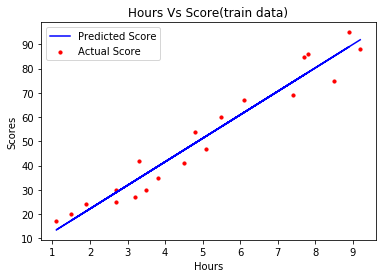

In [714]:
# Plotting the Graph between the Actual score and predicted score on the training dataset(seen data).
plt.scatter(X_train, y_train, color = 'red',s=10,label='Actual Score')
plt.plot(X_train, predict_y_train , color = 'blue',label='Predicted Score')
plt.legend(loc='upper left')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours Vs Score(train data)")
plt.show()

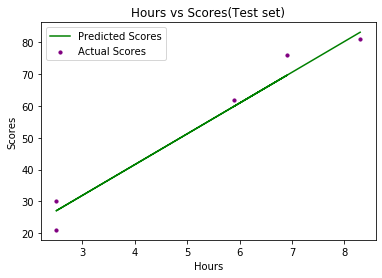

In [715]:
# Plotting the Graph between the Actual score and predicted score on the testing dataset(unseen data).
plt.scatter(X_test, y_test, color = 'purple',s=10,label='Actual Scores')
plt.plot(X_test,predict_y_test , color = 'green',label = 'Predicted Scores')
plt.legend(loc='upper left')
plt.title('Hours vs Scores(Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Predicting the Scores/Marks if any new value of Hour is given.

In [716]:
x = float(input("Enter the number of hours, a student study for the exam   : "))
print("Student obtain {} marks(approx) by studying {} Hours".format(lin.predict([[x]]),x))

Enter the number of hours, a student study for the exam   : 9.25
Student obtain [92.38611528] marks(approx) by studying 9.25 Hours
